# Hands-on Machine Learning with Scikit-learn and Tensorflow
## 03 Classification
This jupyter notebook is just a recitation of the classification project in the book [Hands-on Machine Learning with Scikit-Learn and TensorFlow](https://github.com/ageron/handson-ml). I just add custom notes for my own comprehension. But all the credits goes to __Aurélien Géron__. <br>
You can check the official notebook : https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb.

## Imports

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### Take a look

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

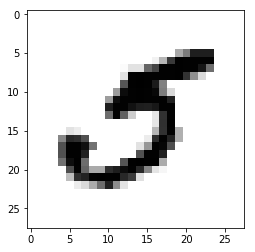

In [8]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest') # good practice

In [9]:
y[36000]

5.0

### Create a test set
Before analyze more the data, we need to create a test set. The MNIST dataset is already split into a training set and a test set.

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [11]:
X_train.shape

(60000, 784)

But we need to shuffle the training set.

In [12]:
import numpy as np

In [13]:
shuffle_index = np.random.permutation(60000)

In [14]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a binary classifier

In [15]:
y_train_5 = (y_train == 5) # very good !
y_test_5 = (y_test == 5)

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf = SGDClassifier(random_state=42)

In [18]:
sgd_clf.fit(X_train, y_train_5)

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

array([ 0.9671 ,  0.94685,  0.9421 ])

### Performance Measures
#### Implementing cross-validation

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [22]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [23]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold) # very good !
    print(n_correct / len(y_pred))

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9671


/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.94685


/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9421


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

array([ 0.9671 ,  0.94685,  0.9421 ])

#### Never five classifier

In [26]:
from sklearn.base import BaseEstimator

In [27]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [28]:
never_5_clf = Never5Classifier()

In [29]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.91035,  0.90635,  0.91225])

### Confusion Matrix

In [30]:
from sklearn.model_selection import cross_val_predict

In [31]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

In [32]:
y_train_pred

array([False, False, False, ..., False, False, False], dtype=bool)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_train_5, y_train_pred)

array([[54177,   402],
       [ 2477,  2944]])

### Precision and recall

In [35]:
from sklearn.metrics import precision_score, recall_score

In [36]:
precision_score(y_train_5, y_train_pred)

0.87985654512851164

In [37]:
recall_score(y_train_5, y_train_pred)

0.5430732337207157

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(y_train_5, y_train_pred)

0.67160944450781346

### Precision/Recall Tradeoff

In [40]:
y_scores = sgd_clf.decision_function([some_digit])

In [41]:
y_scores

array([ 269401.20457084])

In [42]:
treshold = 20000 # 0, 20000 or 

In [43]:
y_some_digit_pred = (y_scores > treshold)

In [44]:
y_some_digit_pred

array([ True], dtype=bool)

In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

In [46]:
from sklearn.metrics import precision_recall_curve

In [47]:
precisions, recalls, tresholds = precision_recall_curve(y_train_5, y_scores)

In [48]:
def plot_precision_recall_vs_treshold(precisions, recalls, thresholds):
    plt.plot(tresholds, precisions[:-1], "b--", label='Precision')
    plt.plot(tresholds, recalls[:-1], "g-", label='Recall')
    plt.xlabel('Treshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

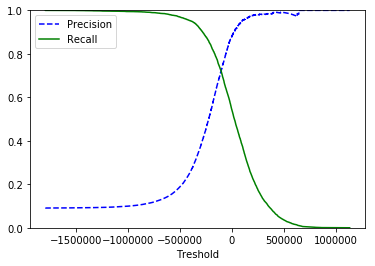

In [49]:
plot_precision_recall_vs_treshold(precisions, recalls, tresholds)

In [50]:
y_train_90 = (y_scores > 70000)

In [51]:
precision_score(y_train_5, y_train_90)

0.93615290768605119

In [52]:
recall_score(y_train_5, y_train_90)

0.42464489946504336

### The ROC Curve
The receiver operating characteristic.

In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr, tpr, tresholds = roc_curve(y_train_5, y_scores)

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

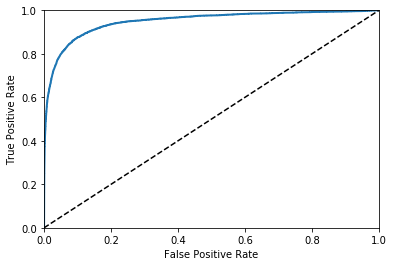

In [56]:
plot_roc_curve(fpr, tpr)

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_train_5, y_scores)

0.94934886181934708

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [61]:
y_scores_forest = y_probas_forest[:, -1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

/Users/seb/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


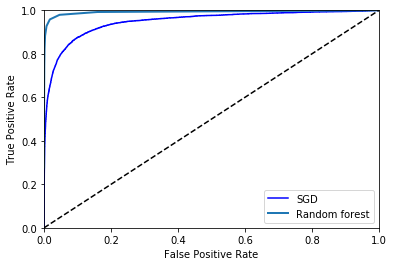

In [62]:
plt.plot(fpr, tpr, 'b', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random forest')
plt.legend(loc='bottom right')

The random forest classifier's ROC curve looks much better than the SGDClassifier's

In [63]:
roc_auc_score(y_train_5, y_scores_forest)

0.99271737956788375

### Multiclass Classification

In [64]:
sgd_clf.fit(X_train, y_train)

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [65]:
sgd_clf.predict([some_digit])

array([ 5.])

In [66]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [67]:
some_digit_scores

array([[-332531.41374175, -449330.77441638, -316067.47755253,
         -97817.30262677, -518653.72931259,  269401.20457084,
        -859606.26803994, -263958.20158364, -649547.59006503,
        -690013.1161924 ]])

In [68]:
np.argmax(some_digit_scores)

5

In [69]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [70]:
sgd_clf.classes_[5]

5.0

In [71]:
from sklearn.multiclass import OneVsOneClassifier

In [72]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

array([ 5.])

In [73]:
len(ovo_clf.estimators_)

45

#### Random Forest Classifier

In [74]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [75]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0. ,  0.2,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [76]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

array([ 0.85437912,  0.81179059,  0.86632995])

#### Scaling the inputs

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

array([ 0.9120176 ,  0.90894545,  0.90928639])

### Error Analysis

In [79]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/seb/anaconda3

In [80]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5738,    4,   24,   11,    9,   39,   44,   13,   37,    4],
       [   2, 6496,   49,   23,    6,   39,    9,    8,  100,   10],
       [  50,   37, 5341,   99,   89,   28,   83,   56,  159,   16],
       [  49,   47,  146, 5344,    1,  233,   34,   53,  135,   89],
       [  18,   28,   39,    6, 5368,    7,   51,   32,   86,  207],
       [  72,   49,   31,  187,   78, 4597,  109,   30,  177,   91],
       [  31,   24,   46,    2,   46,   97, 5619,    9,   44,    0],
       [  20,   21,   72,   33,   59,   11,    4, 5810,   18,  217],
       [  44,  156,   73,  168,   17,  150,   56,   24, 5027,  136],
       [  41,   33,   26,   88,  170,   40,    1,  209,   76, 5265]])

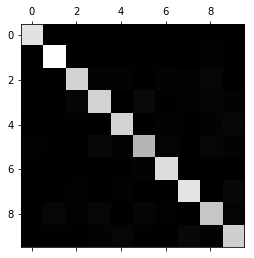

In [81]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [82]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

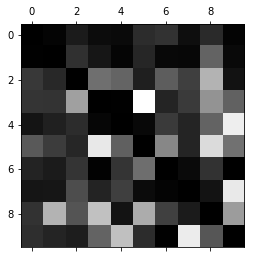

In [83]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

### Multilabel Classification

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [86]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [87]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [88]:
# very long to launch !
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
# f1_score(y_multilabel, y_train_knn_pred, average='macro')

### Multioutput Classification

In [89]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [90]:
def plot_digit(sample):
    return plt.imshow(sample.reshape(28,28), cmap=plt.cm.gray_r)

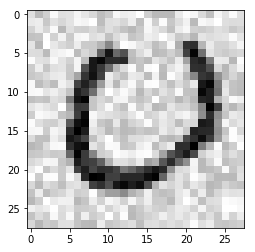

In [91]:
plot_digit(X_train_mod[0])

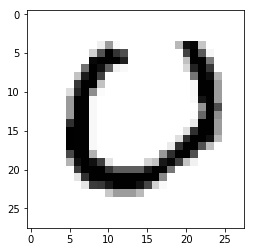

In [92]:
plot_digit(y_train_mod[0])

In [93]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

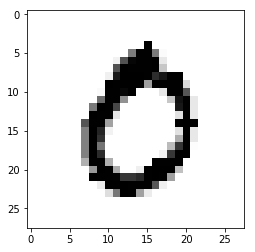

In [94]:
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)

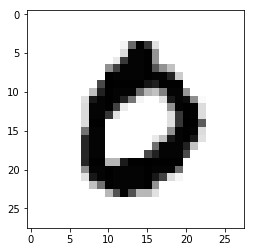

In [95]:
plot_digit(y_test_mod[0])

### Exercices

#### MNIST KNeighborsClassifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/seb/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [97]:
parameters = {'weights': ['uniform', 'distance'], 'n_neighbors': [3]}

In [98]:
knb_clf = KNeighborsClassifier()

In [99]:
gscv = GridSearchCV(knb_clf, parameters, cv=3, verbose=3)

In [100]:
# gscv.fit(X_train_scaled, y_train)

#### Spam Classifier
##### Download and Extract

In [101]:
import os
import urllib
import tarfile

In [102]:
DOWNLOAD_ROOT = 'http://spamassassin.apache.org/old/publiccorpus/'
HAM_URL = DOWNLOAD_ROOT + '20030228_easy_ham.tar.bz2'
SPAM_URL = DOWNLOAD_ROOT + '20030228_spam.tar.bz2'
DATASET_PATH = os.path.join('datasets', 'spam')
HAM_PATH = os.path.join(DATASET_PATH, 'ham.tar.bz2')
SPAM_PATH = os.path.join(DATASET_PATH, 'spam.tar.bz2')

In [103]:
HAM_NAME = os.path.join(DATASET_PATH, 'easy_ham')
SPAM_NAME = os.path.join(DATASET_PATH, 'spam')

In [104]:
if not os.path.isdir(DATASET_PATH):
    os.makedirs(DATASET_PATH)

In [105]:
def download(url, path):
    urllib.request.urlretrieve(url, path)    

In [106]:
download(HAM_URL, HAM_PATH)
download(SPAM_URL, SPAM_PATH)

In [107]:
def extract(input_path, output_path):
    with tarfile.open(input_path) as file:
        file.extractall(path=output_path)

In [108]:
extract(HAM_PATH, DATASET_PATH)
extract(SPAM_PATH, DATASET_PATH)

##### Load Data
- load each email in dataframe
- extract the features that matter
- identify how many differents we have
- convert each mail in vector

In [109]:
# loop in folder
# print txt

In [110]:
files = os.listdir(HAM_NAME)
files[0]

'00769.25bf9a767b5db0ed93f03c1637281663'

In [112]:
os.path.join(HAM_NAME, files[0])

'datasets/spam/easy_ham/00769.25bf9a767b5db0ed93f03c1637281663'

In [116]:
with open(os.path.join(HAM_NAME, files[0]), 'r') as f:
    print(f.read())

From fork-admin@xent.com  Tue Sep 24 17:55:30 2002
Return-Path: <fork-admin@xent.com>
Delivered-To: yyyy@localhost.spamassassin.taint.org
Received: from localhost (jalapeno [127.0.0.1])
	by jmason.org (Postfix) with ESMTP id 070DF16F03
	for <jm@localhost>; Tue, 24 Sep 2002 17:55:30 +0100 (IST)
Received: from jalapeno [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Tue, 24 Sep 2002 17:55:30 +0100 (IST)
Received: from xent.com ([64.161.22.236]) by dogma.slashnull.org
    (8.11.6/8.11.6) with ESMTP id g8OGAEC11404 for <jm@jmason.org>;
    Tue, 24 Sep 2002 17:10:14 +0100
Received: from lair.xent.com (localhost [127.0.0.1]) by xent.com (Postfix)
    with ESMTP id ACE072940DA; Tue, 24 Sep 2002 09:06:08 -0700 (PDT)
Delivered-To: fork@spamassassin.taint.org
Received: from imo-r09.mx.aol.com (imo-r09.mx.aol.com [152.163.225.105])
    by xent.com (Postfix) with ESMTP id 522F329409A for <fork@xent.com>;
    Tue, 24 Sep 2002 09:05:51 -0700 (PDT)
Received: fro

In [117]:
import pandas as pd

In [118]:
df = pd.DataFrame(columns=['file_name', 'text'])

In [127]:
for row, file_name in enumerate(files):
    df[row, 'file_name'] = file_name
    with open(os.path.join(HAM_NAME, file_name), 'rb') as f:
        df[row, 'text'] = f.read()

In [128]:
df.head()

,file_name,text,"(0, text)","(0, file_name)","(1, text)","(1, file_name)","(2, text)","(2, file_name)","(3, text)","(3, file_name)",...,"(file_name, 2496)","(text, 2496)","(file_name, 2497)","(text, 2497)","(file_name, 2498)","(text, 2498)","(file_name, 2499)","(text, 2499)","(file_name, 2500)","(text, 2500)"
